# Time Series Forecast with Basic RNN

* Dataset is downloaded from https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data/pm25.csv')

print(df.shape)
df.head()

(43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
df.isnull().sum()*100/df.shape[0]

No       0.000000
year     0.000000
month    0.000000
day      0.000000
hour     0.000000
pm2.5    4.716594
DEWP     0.000000
TEMP     0.000000
PRES     0.000000
cbwd     0.000000
Iws      0.000000
Is       0.000000
Ir       0.000000
dtype: float64

In [4]:
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(
    lambda row: datetime.datetime(year=row['year'], 
                                  month=row['month'], day=row['day'],hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [6]:
df['year'].value_counts()

2013    8678
2014    8661
2012    8295
2010    8091
2011    8032
Name: year, dtype: int64

Text(0, 0.5, 'pm2.5 readings')

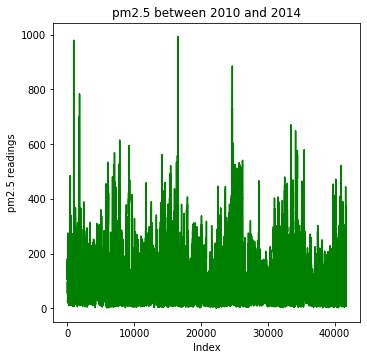

In [7]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(data=df['pm2.5'], color='g')
g.set_title('pm2.5 between 2010 and 2014')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

### Note

* Scaling the variables will make optimization functions work better, so here going to scale the variable into [0,1] range

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))

df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


Text(0, 0.5, 'scaled_pm2.5 readings')

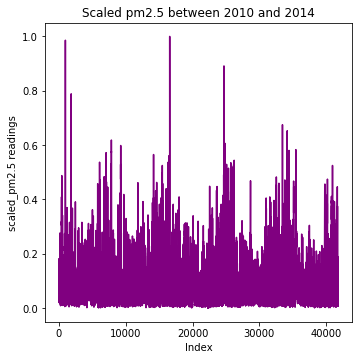

In [9]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(data=df['scaled_pm2.5'], color='purple')
g.set_title('Scaled pm2.5 between 2010 and 2014')
g.set_xlabel('Index')
g.set_ylabel('scaled_pm2.5 readings')

In [10]:
# 2014 data as validation data, before 2014 as training data
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)  
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [11]:
df_val.reset_index(drop=True, inplace=True)
df_val.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.024145
1,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.053320
2,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.065392
3,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.070423
4,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.079477


In [12]:
# The way this works is to have the first nb_timesteps-1 observations as X and nb_timesteps_th as the target,
## collecting the data with 1 stride rolling window.

def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
        
    X, y = np.array(X), np.array(y)
    return X, y

In [30]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [31]:
print(X_train[0], y_train[0])
print(X_train[1], y_train[1])

[0.12977867 0.14889336 0.15995976 0.18209256 0.138833   0.10965795
 0.1056338 ] 0.12474849094567406
[0.14889336 0.15995976 0.18209256 0.138833   0.10965795 0.1056338
 0.12474849] 0.12072434607645877


In [32]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


In [33]:
print(X_val[0], y_val[0])
print(X_val[1], y_val[1])

[0.02414487 0.05331992 0.06539235 0.07042254 0.07947686 0.09255533
 0.10663984] 0.07545271629778673
[0.05331992 0.06539235 0.07042254 0.07947686 0.09255533 0.10663984
 0.07545272] 0.05835010060362174


### Note

* In 2D array above for X_train, X_val, it means (number of samples, number of time steps)
* However RNN input has to be 3D array, (number of samples, number of time steps, number of features per timestep)
  * Only 1 feature which is scaled_pm2.5
* So, the code below converts 2D array to 3D array

In [36]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


In [23]:
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dense, Dropout, Input
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_absolute_error

In [43]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train.shape[1:])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mae'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [45]:
save_weights_at = 'basic_rnn_model'
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
history = model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 33089 samples, validate on 8654 samples
Epoch 1/20
33089/33089 [==============================] - 10s 294us/step - loss: 0.0148 - mae: 0.0148 - val_loss: 0.0132 - val_mae: 0.0132
Epoch 2/20
33089/33089 [==============================] - 9s 282us/step - loss: 0.0149 - mae: 0.0149 - val_loss: 0.0147 - val_mae: 0.0147
Epoch 3/20
33089/33089 [==============================] - 9s 284us/step - loss: 0.0148 - mae: 0.0148 - val_loss: 0.0128 - val_mae: 0.0128
Epoch 4/20
33089/33089 [==============================] - 10s 289us/step - loss: 0.0148 - mae: 0.0148 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 5/20
33089/33089 [==============================] - 10s 289us/step - loss: 0.0148 - mae: 0.0148 - val_loss: 0.0145 - val_mae: 0.0145
Epoch 6/20
33089/33089 [==============================] - 9s 286us/step - loss: 0.0148 - mae: 0.0148 - val_loss: 0.0132 - val_mae: 0.0132
Epoch 7/20
33089/33089 [==============================] - 10s 289us/step - loss: 0.0149 - mae: 0.0149 - val_loss: 0.0120

In [50]:
# load the best model
best_model = load_model('basic_rnn_model')

# Compare the prediction with y_true
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

# Measure MAE of y_pred and y_true
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

mae = mean_absolute_error(df_val['scaled_pm2.5'].loc[7:], preds)
print('MAE for the scaled validation set:', round(mae, 4))

MAE for the validation set: 11.9702
MAE for the scaled validation set: 0.012


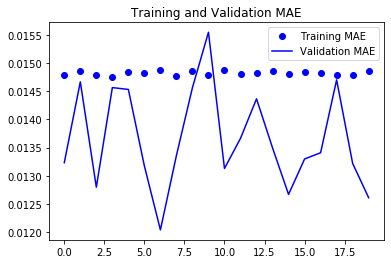

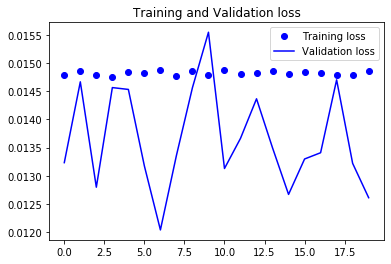

In [54]:
# Check the metrics and loss of each apoch
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()

plt.figure()

# Here I was using MAE as loss too, that's why they lookedalmost the same...
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### Note

* Best model saved by `ModelCheckpoint` saved 7th epoch result, which had 0.12 val_loss
* From the history plot of training vs validation loss, 7th epoch result (i=6) has the lowest validation loss. This aligh with the result from `ModelCheckpoint`